### STA 4724: Homework 3 - Due Friday, Oct. 18 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Caitlin Box                

**Your ID:** 5280694

## Question 1: kNN
For the *yeast* dataset, we want to predicte the compartment in a cell that a yeast protein will localize to based on properties of its sequence.

**(a)** Read the training and testing datasets.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# reading the data
train = pd.read_csv("yeast_train.csv")
test = pd.read_csv("yeast_test.csv")

# x - the features, y - the labels
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

**(b)** Use leave-one-out cross validation to select the value of $k$ for kNN model.

Hint 1: try to apply kNN with a fixed $k$ first, then figure out how to use cross validation. In *yeast_3.txt*, I list the result when $k=3$ and you can use it as a reference.

Hint 2: Some of the $k$ values are not suitable to be the "best". You shouldn't even test them in the cross validation.

In [3]:
def loo_cv(X, y, k_values):
    best_k = None
    # starting point 
    best_acc = 0.0
    
    for k in k_values:
        # to store if prediction is correct 
        preds = []
        for i in range(len(X)):
            # removing i-th row for testing
            X_train_cv = np.delete(X, i, axis=0)
            y_train_cv = np.delete(y, i, axis=0)
            X_val = X[i].reshape(1, -1)
            y_val = y[i]
            
            # train kNN
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_cv, y_train_cv)
            pred = model.predict(X_val)[0]
            preds.append(pred == y_val)
        
        acc = np.mean(preds)
        print(f"k={k}, LOO-CV Accuracy={acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_k = k
            
    return best_k, best_acc

# define candidate k values (avoid too large or too small)
k_candidates = [1, 3, 5, 7, 9]
best_k, best_acc = loo_cv(X_train, y_train, k_candidates)
print(f"\nBest k={best_k} with accuracy={best_acc:.4f}")

k=1, LOO-CV Accuracy=0.5611
k=3, LOO-CV Accuracy=0.5197
k=5, LOO-CV Accuracy=0.5255
k=7, LOO-CV Accuracy=0.5120
k=9, LOO-CV Accuracy=0.5120

Best k=1 with accuracy=0.5611


k=1, LOO-CV Accuracy=0.5611

k=3, LOO-CV Accuracy=0.5197

k=5, LOO-CV Accuracy=0.5255

k=7, LOO-CV Accuracy=0.5120

k=9, LOO-CV Accuracy=0.5120

Best k=1 with accuracy=0.5611

**(c)** Train the kNN model with the best $k$, and use it to predicte the testing data.

In [4]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

**(d)** Print the confusion matrix, then manually compute the accuracy based on the confusion matrix. That is, don't call any built-in function for the accuracy, but type the equation you will use for calculating the accuracy.

In [5]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

total = np.sum(cm)
correct = np.trace(cm)  # sum of diagonal
accuracy = correct / total

print(f"\nManual Accuracy = {accuracy:.4f}")


Confusion Matrix:
[[31  1  5  3 12 12 38 34  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  1  3  0  1]
 [ 1  1  0  0  0  2  6  4  0  0]
 [ 8  0  1  2  1  1  2  3  0  0]
 [13  1  0  1  1  5  9 17  0  0]
 [28  0  5  2  4  9 19 12  1  1]
 [32  1  1  2  1 17 32 35  2  0]
 [ 3  0  0  0  0  1  3  1  0  0]
 [ 2  0  0  1  0  0  1  2  0  0]]

Manual Accuracy = 0.2045


<!-- Confusion Matrix -->
<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>True \ Pred</th>
      <th>C1</th>
      <th>C2</th>
      <th>C3</th>
      <th>C4</th>
      <th>C5</th>
      <th>C6</th>
      <th>C7</th>
      <th>C8</th>
      <th>C9</th>
      <th>C10</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>C1</td><td>31</td><td>1</td><td>5</td><td>3</td><td>12</td><td>12</td><td>38</td><td>34</td><td>1</td><td>1</td></tr>
    <tr><td>C2</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>C3</td><td>5</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>1</td><td>3</td><td>0</td><td>1</td></tr>
    <tr><td>C4</td><td>1</td><td>1</td><td>0</td><td>0</td><td>0</td><td>2</td><td>6</td><td>4</td><td>0</td><td>0</td></tr>
    <tr><td>C5</td><td>8</td><td>0</td><td>1</td><td>2</td><td>1</td><td>1</td><td>2</td><td>3</td><td>0</td><td>0</td></tr>
    <tr><td>C6</td><td>13</td><td>1</td><td>0</td><td>1</td><td>1</td><td>5</td><td>9</td><td>17</td><td>0</td><td>0</td></tr>
    <tr><td>C7</td><td>28</td><td>0</td><td>5</td><td>2</td><td>4</td><td>9</td><td>19</td><td>12</td><td>1</td><td>1</td></tr>
    <tr><td>C8</td><td>32</td><td>1</td><td>1</td><td>2</td><td>1</td><td>17</td><td>32</td><td>35</td><td>2</td><td>0</td></tr>
    <tr><td>C9</td><td>3</td><td>0</td><td>0</td><td>0</td><td>0</td><td>1</td><td>3</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><td>C10</td><td>2</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td><td>1</td><td>2</td><td>0</td><td>0</td></tr>
  </tbody>
</table>

<p><strong>Manual Accuracy = 0.2045</strong></p>


## Question 2: Logistic Regression

We study the *myopia* dataset in this problem.

**(a)** Read the data file and make a scatterplot of MYOPIA vs. SPHEQ.

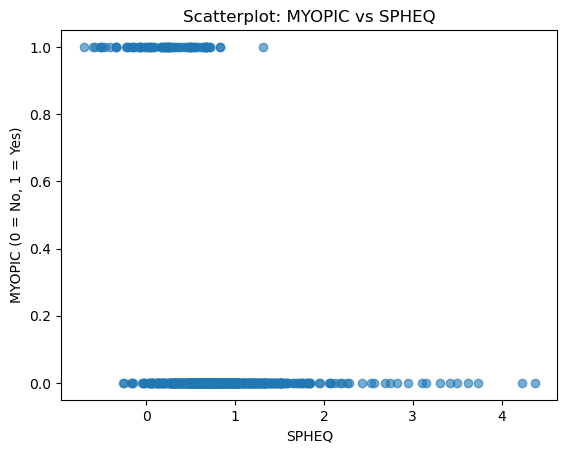

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

data = pd.read_csv("myopia.csv")

plt.scatter(data["SPHEQ"], data["MYOPIC"], alpha=0.6)
plt.xlabel("SPHEQ")
plt.ylabel("MYOPIC (0 = No, 1 = Yes)")
plt.title("Scatterplot: MYOPIC vs SPHEQ")
plt.show()

**(b)** Fit the logistic regression model of SPHEQ on MYOPIA

In [6]:
X = sm.add_constant(data["SPHEQ"])  # predictor with constant
y = data["MYOPIC"]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Extract coefficients directly (avoid summary())
b0, b1 = result.params
print("Intercept (b0):", b0)
print("Slope (b1):", b1)

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8
Intercept (b0): 0.05397314115265484
Slope (b1): -3.83309759727968


<!-- Logistic Regression Coefficients -->
<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Variable</th>
      <th>Coef</th>
      <th>Std Err</th>
      <th>z</th>
      <th>P&gt;|z|</th>
      <th>[0.025</th>
      <th>0.975]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>const</td>
      <td>0.0540</td>
      <td>0.207</td>
      <td>0.261</td>
      <td>0.794</td>
      <td>-0.351</td>
      <td>0.459</td>
    </tr>
    <tr>
      <td>SPHEQ</td>
      <td>-3.8331</td>
      <td>0.418</td>
      <td>-9.162</td>
      <td>0.000</td>
      <td>-4.653</td>
      <td>-3.013</td>
    </tr>
  </tbody>
</table>


#### Fitted Logistic Regression Equation:

logit(p)=0.0540−3.8331⋅SPHEQ

**(c)** Plot the logistic function found in (b) together with the scatterplot. You are looking for something like 

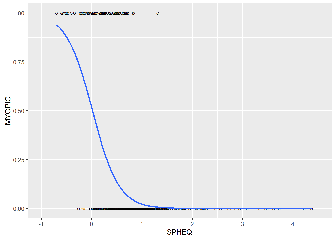

Hint: Although we didn't make this logistic function plot in class, the idea behind it is similar to the linear function plot in the earlier lecture. 

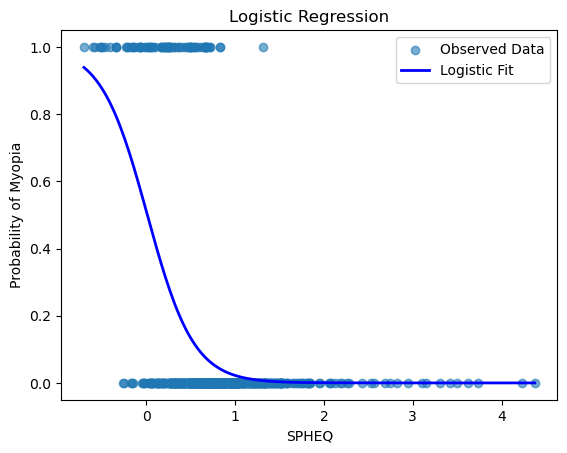

In [8]:
x_vals = np.linspace(data["SPHEQ"].min(), data["SPHEQ"].max(), 200)

y_vals = 1 / (1 + np.exp(-(b0 + b1 * x_vals)))

plt.scatter(data["SPHEQ"], data["MYOPIC"], alpha=0.6, label="Observed Data")

plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Logistic Fit")

plt.xlabel("SPHEQ")
plt.ylabel("Probability of Myopia")
plt.title("Logistic Regression")
plt.legend()
plt.show()

## Question 3: Naive Bayes
We have the *vote* datasets collected from 1984 United States Congressional Voting Records.

**(a)** Read the training and testing data file, and make any necessary preprocess so the data is ready to be used by naive bayes.

Hint: computer cannot read 'y/n' just like it cannot read tweets directly.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

train = pd.read_csv("vote_train.csv")
test = pd.read_csv("vote_test.csv")

# Clean column names (strip quotes/whitespace)
train.columns = train.columns.str.strip().str.strip("'").str.strip('"')
test.columns = test.columns.str.strip().str.strip("'").str.strip('"')

# Drop id column, separate features and labels
X_train = train.drop(columns=["id", "class"]).copy()
y_train = train["class"].copy()

X_test = test.drop(columns=["id", "class"]).copy()
y_test = test["class"].copy()

# Map categorical values 'y','n','?' → numbers
mapping = {"y": 1, "n": 0, "?": 2}
X_train = X_train.map(lambda v: mapping[v])
X_test = X_test.map(lambda v: mapping[v])

# Map labels: republican → 1, democrat → 0
label_map = {"republican": 1, "democrat": 0}
y_train = y_train.map(label_map).values
y_test = y_test.map(label_map).values

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (379, 16)  Test shape: (56, 16)


**(b)** Train the bayes model and use it to predict the voting result on the testing data.

In [10]:
model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("First 10 predictions:", y_pred[:10])
print("First 10 true labels:", y_test[:10])

First 10 predictions: [1 0 0 1 0 1 1 0 0 1]
First 10 true labels: [1 0 0 0 0 0 0 0 0 0]


**(c)** Plot the ROC curve and report AUC.

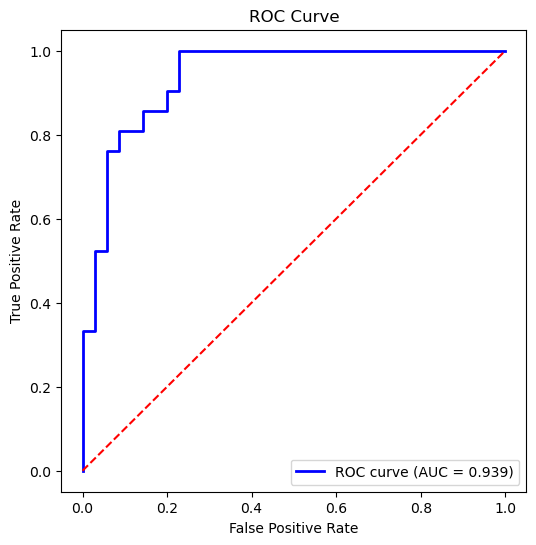

AUC = 0.939


In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC = {roc_auc:.3f}")